# Import Necessary Libreries

In [1]:
import docx
import glob
import warnings
warnings.filterwarnings("ignore")
import spacy
import pickle
import random
import docs
from spacy import displacy
import docx
import spacy
from spacy import schemas
from spacy import Dict
from spacy import displacy
from spacy.lang.en.stop_words import  STOP_WORDS
import string
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import doc
import textract
import antiword
from PyPDF2 import PdfFileReader
import re
import re
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('maxent_ne_chunker')
#nltk.download('words')
from spacy.matcher import Matcher
#nltk.download('stopwords')
#nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nlp = spacy.load("en_core_web_trf")
import doc

In [2]:
import textract
import antiword
from PyPDF2 import PdfFileReader
import re
import re
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('maxent_ne_chunker')
#nltk.download('words')
from spacy.matcher import Matcher
#nltk.download('stopwords')
#nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import docx
import glob
import doc
import textract
import antiword
from PyPDF2 import PdfFileReader
import re
import re
import nltk

# Import Data 

In [3]:
string = 'calvin klein design dress calvin klein'

def uniquify(string):
    output = []
    seen = set()
    for word in string.split():
        if word not in seen:
            output.append(word)
            seen.add(word)
    return ' '.join(output)

print(uniquify(string))

calvin klein design dress


In [4]:
def readtxt(filename):
    doc = docx.Document(filename)
    fullText = []
    for para in doc.paragraphs:
        fullText.append(para.text)
    return '\n'.join(fullText)

In [5]:
data1=pd.read_csv("./Peoplesoft_Resumes.csv")
data2=pd.read_csv("./React_Developer_resumes.csv")
data3=pd.read_csv("./SQLDeveloperLightning_Resumes.csv")
data4=pd.read_csv("./intership_resumes.csv")
data5=pd.read_csv("./workday_resumes.csv")

In [6]:
final_df=pd.concat([data1,data2,data3,data4,data5],axis=0)
final_df=final_df.reset_index()
final_df=final_df.drop(columns='Unnamed: 0',axis=0)
final_df=final_df.drop(columns='index',axis=0)
final_df

cv           label
0     Anubhav Kumar Singh\t\t\n\n  To work in a gl...      Peoplesoft
1   \n\n\n\n\n\n\t\n\nProfile Summary:\t\t\t\t\t\t...      Peoplesoft
2   PeopleSoft Database Administrator\n           ...      Peoplesoft
3   Murali\n\nExperience Summary \n\nI have 6 year...      Peoplesoft
4   \n\n\n\n\n\n\n\n\n\n\n\n\n\nPROFILE SUMMARY\n\...      Peoplesoft
..                                                ...             ...
72  swamy sarnala\n2021-11-01\n\nWorkday Integrati...  workdayResumes
73  Seeking suitable positions in Workday HCM  as ...  workdayResumes
74  \nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...  workdayResumes
75  Mathu Kumaran\nvenki\n2021-11-01\n\nVenkateswa...  workdayResumes
76                                                ...  workdayResumes

[77 rows x 2 columns]

# Exploratory Data Analysis (EDA) And Data Understanding

# Text Preprocessing

## Text Cleaning

In [7]:
clean = []
lz = WordNetLemmatizer()
for i in range(final_df.shape[0]):
    review = re.sub(
        '(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?"',
        " ",
        final_df["cv"].iloc[i],
    )
    review = re.sub(r"[0-9]+", " ", review) # Remove Numbers
    review = review.lower()
    review = review.split()
    lm = WordNetLemmatizer()
    review = [ lz.lemmatize(word) for word in review if word not in STOP_WORDS]
    review = " ".join(review)
    clean.append(review)

In [8]:
final_df["Clean_Resume"] = clean

In [9]:
final_df["Clean_Resume"]=final_df["Clean_Resume"].apply(uniquify)

In [10]:
final_df["Clean_Resume"][0]

'anubhav kumar singh work globally competitive environment challenging assignment shall yield twin benefit job satisfaction steady paced professional growth experience current hcl role system admin offshore skill shell scripting linux peoplesoft administration github managing hcm fscm production support installed window o involved day activity project migration database refresh change tax update etc troubleshooting server like application web process scheduler applying tuxedo weblogic middleware cpu patch working integration method exchange file external installation tier setup requirement reviewing vulnerability reported security team renewal ssl remediation report rmis worked pum manager dpk knowledge ansible docker developing new script failure techmahindra automation devops tool jenkins people upgrade ntt cloud premise aws automated start stop basic certificate released elastic search configuration gained resource strong understanding unix architecture command trouble shooting plat

## Performing A NER (Using Spacy)

In [11]:
nlp = spacy.load("en_core_web_trf")

In [12]:
text=nlp(final_df["Clean_Resume"][0])

In [13]:
displacy.render(text, style = "ent")

In [14]:
resume_data=pd.DataFrame()

In [15]:
resume_data["Resume"]=final_df["Clean_Resume"]
resume_data["category"]=final_df["label"]
resume_data

Resume        category
0   anubhav kumar singh work globally competitive ...      Peoplesoft
1   profile summary year experience implementing u...      Peoplesoft
2   peoplesoft database administrator gangareddy p...      Peoplesoft
3   murali experience summary year working peoples...      Peoplesoft
4   profile summary overall year experience people...      Peoplesoft
..                                                ...             ...
72  swamy sarnala workday integration consultant s...  workdayResumes
73  seeking suitable position workday hcm techno f...  workdayResumes
74  workday hcm fcm kumar s role consultant profes...  workdayResumes
75  mathu kumaran venki venkateswarlu b workday co...  workdayResumes
76  vinay kumar v workday functional consultant ex...  workdayResumes

[77 rows x 2 columns]

In [93]:
#r_data=resume_data
#r_data=r_data.drop(columns=["Encoded_Skill"],axis=1)
#r_data

Resume        category
0   anubhav kumar singh work globally competitive ...      Peoplesoft
1   profile summary year experience implementing u...      Peoplesoft
2   peoplesoft database administrator gangareddy p...      Peoplesoft
3   murali experience summary year working peoples...      Peoplesoft
4   profile summary overall year experience people...      Peoplesoft
..                                                ...             ...
72  swamy sarnala workday integration consultant s...  workdayResumes
73  seeking suitable position workday hcm techno f...  workdayResumes
74  workday hcm fcm kumar s role consultant profes...  workdayResumes
75  mathu kumaran venki venkateswarlu b workday co...  workdayResumes
76  vinay kumar v workday functional consultant ex...  workdayResumes

[77 rows x 2 columns]

In [94]:
#r_data=r_data.to_csv("final_cleaned_data.csv")

In [16]:
from sklearn.preprocessing import LabelEncoder
le_encoder=LabelEncoder()

In [17]:
resume_data["Encoded_Skill"]=le_encoder.fit_transform(resume_data["category"])

In [18]:
resume_data

Resume        category  \
0   anubhav kumar singh work globally competitive ...      Peoplesoft   
1   profile summary year experience implementing u...      Peoplesoft   
2   peoplesoft database administrator gangareddy p...      Peoplesoft   
3   murali experience summary year working peoples...      Peoplesoft   
4   profile summary overall year experience people...      Peoplesoft   
..                                                ...             ...   
72  swamy sarnala workday integration consultant s...  workdayResumes   
73  seeking suitable position workday hcm techno f...  workdayResumes   
74  workday hcm fcm kumar s role consultant profes...  workdayResumes   
75  mathu kumaran venki venkateswarlu b workday co...  workdayResumes   
76  vinay kumar v workday functional consultant ex...  workdayResumes   

    Encoded_Skill  
0               1  
1               1  
2               1  
3               1  
4               1  
..            ...  
72              4  
73              4  
74              4  
75              4  
76              4  

[77 rows x 3 columns]

In [19]:
resume_data.Encoded_Skill.unique()

array([1, 2, 3, 0, 4])

In [20]:
resume_data.category.value_counts()

ReactDeveloper    21
workdayResumes    21
Peoplesoft        20
SQLDeveloper      13
Internship         2
Name: category, dtype: int64

In [21]:
print ("Displaying the distinct categories of resume -")
print (resume_data.category.unique())

Displaying the distinct categories of resume -
['Peoplesoft' 'ReactDeveloper' 'SQLDeveloper' 'Internship'
 'workdayResumes']


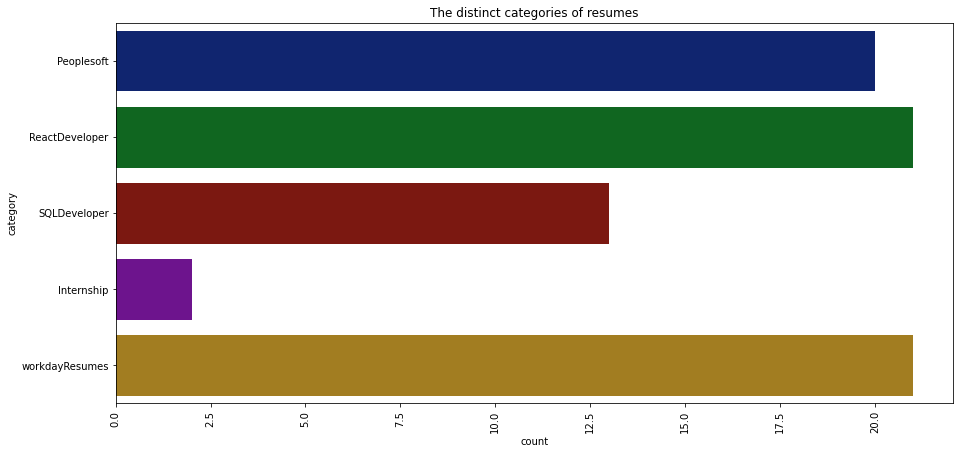

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark-palette')
plt.figure(figsize=(15,7))
plt.title("The distinct categories of resumes")
plt.xticks(rotation=90)
sns.countplot(y="category", data=resume_data,color=None)
plt.show()

In [23]:
import numpy as np

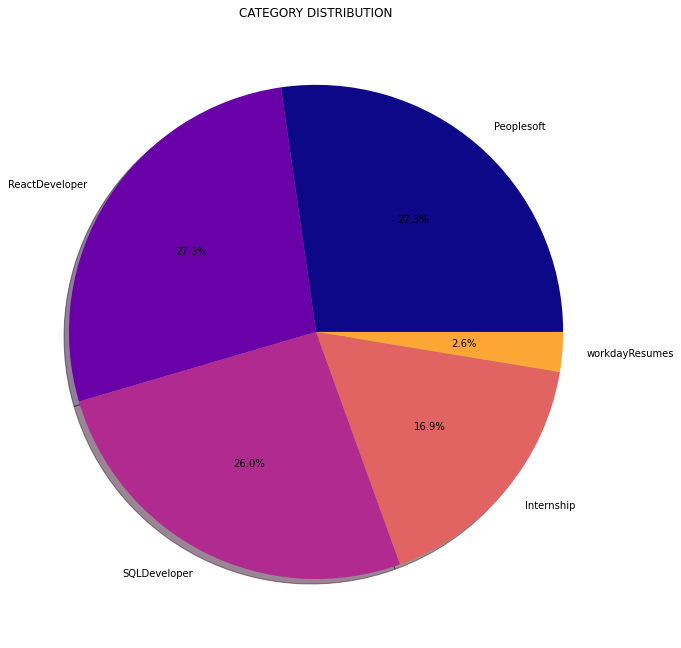

In [24]:
from matplotlib.gridspec import GridSpec
targetCounts = resume_data.category.value_counts()
targetLabels  = resume_data.category.unique()
# Make square figures and axes
plt.figure(1, figsize=(25,25))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('plasma')
colors = [cmap(i) for i in np.linspace(0, 1, 6)]
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')
plt.style.use('seaborn-dark-palette')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

###  First  take a look at the number of Characters present in each sentence. This can give us a rough idea about the resume length


 ### Caculating each Characterstic in dataframe

In [25]:
characters=resume_data["Resume"].apply(len)
characters

0     2198
1     2432
2     1909
3     1138
4     1528
      ... 
72    2200
73    2244
74    2454
75    1267
76    1987
Name: Resume, Length: 77, dtype: int64

In [26]:
print('Mean of each characters in datset:',characters.mean())
print('Median of characters in dataset:',characters.median())
print('Standard Deviation of characters in dataset:',characters.std())
print('skew of characters dataset:',characters.skew())
print('sum of characters dataset:',characters.sum())

Mean of each characters in datset: 1714.1038961038962
Median of characters in dataset: 1647.0
Standard Deviation of characters in dataset: 695.5619383751527
skew of characters dataset: 0.41431041512197064
sum of characters dataset: 131986


In [27]:
characters.describe()

count      77.000000
mean     1714.103896
std       695.561938
min       120.000000
25%      1210.000000
50%      1647.000000
75%      2200.000000
max      3746.000000
Name: Resume, dtype: float64

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='Density'>

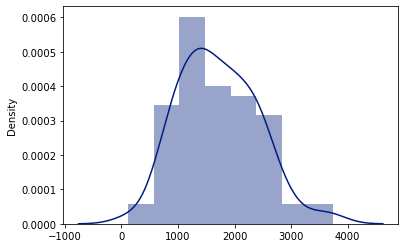

In [29]:
sns.distplot(x = characters)

### Caculating each Word Characterstic in dataframe

In [30]:
words = resume_data['Resume'].apply(lambda x: len(str(x).split(' ')))
words

0     283
1     315
2     251
3     142
4     201
     ... 
72    271
73    289
74    326
75    159
76    246
Name: Resume, Length: 77, dtype: int64

<AxesSubplot:ylabel='Density'>

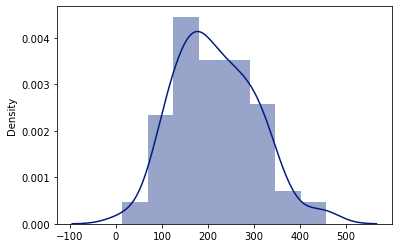

In [31]:
sns.distplot(x = words)

In [32]:
print('Mean of each words in datset:',words.mean())
print('Median of words in dataset:',words.median())
print('Standard Deviation of words in dataset:',words.std())
print('skew of words dataset:',words.skew())
print('sum of words dataset:', words.sum())

Mean of each words in datset: 216.07792207792207
Median of words in dataset: 206.0
Standard Deviation of words in dataset: 86.93172854145013
skew of words dataset: 0.3773682631795854
sum of words dataset: 16638


In [33]:
words.describe()

count     77.000000
mean     216.077922
std       86.931729
min       14.000000
25%      158.000000
50%      206.000000
75%      276.000000
max      457.000000
Name: Resume, dtype: float64

In [34]:
freq_Sw = pd.Series(' '.join(resume_data['Resume']).split()).value_counts() 
freq_Sw

experience        73
project           71
year              70
skill             67
knowledge         63
                  ..
pedireddy          1
venkatalakshmi     1
degraded           1
capable            1
osi                1
Length: 3541, dtype: int64

<AxesSubplot:>

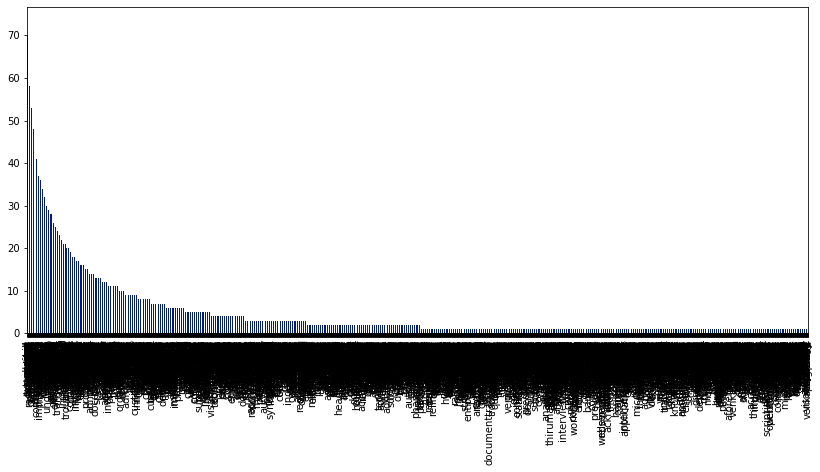

In [35]:
freq_Sw.plot(kind = 'bar',figsize=(14,6))

In [36]:
len_resume = resume_data['Resume'].astype(str).apply(len)
len_resume

0     2198
1     2432
2     1909
3     1138
4     1528
      ... 
72    2200
73    2244
74    2454
75    1267
76    1987
Name: Resume, Length: 77, dtype: int64

<AxesSubplot:ylabel='Density'>

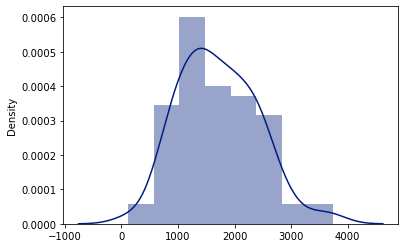

In [37]:
sns.distplot(x = len_resume)

In [38]:
from collections import Counter
import seaborn as sns

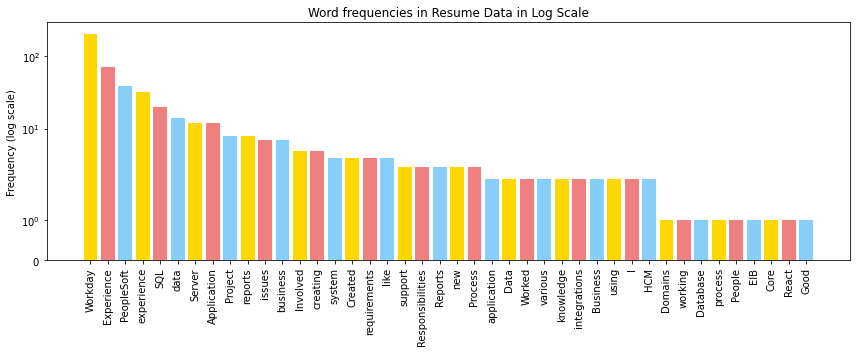

In [39]:
words =['using','Workday','Experience','PeopleSoft',
 'experience','SQL','Application','data','Server',
 'business','Project','reports','like','HCM','Worked',
 'knowledge','Involved','various','Good', 'Reports','React','EIB','integrations','Web','system','creating','issues',
 'Created', 'Responsibilities','Process','process','support', 
 'application','new','People','I','team','working', 
 'Database','database','Integration','Domains','client', 
 'requirements','Core',  'Business', 
'Oracle','Report', 'Developer', 'Data']
indices = np.random.zipf(1.6, size=500).astype(np.int) % len(words)
tw = np.array(words)[indices]

tf = Counter(tw)

y = [count for tag, count in tf.most_common(50)]
x = [tag for tag, count in tf.most_common(50)]
plt.style.use('seaborn-dark-palette')
plt.figure(figsize=(12,5))
plt.bar(x, y, color=['gold','lightcoral', 'lightskyblue'])
plt.title("Word frequencies in Resume Data in Log Scale")
plt.ylabel("Frequency (log scale)")
plt.yscale('symlog') # optionally set a log scale for the y-axis
plt.xticks(rotation=90)
#for i, (tag, count) in enumerate(tf.most_common(50)):
    #plt.text(i, count, f' {count} ', rotation=90,
             #ha='center', va='top' if i < 10 else 'bottom', color='white' if i < 10 else 'black')
#plt.xlim(-0.6, len(x)-0.4) # optionally set tighter x lims
plt.tight_layout() # change the whitespace such that all labels fit nicely
plt.show()

In [40]:
def wordBarGraphFunction_1(df,column,title):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    plt.style.use('fivethirtyeight')
    sns.barplot(x=np.arange(20),y= [word_count_dict[w] for w in reversed(popular_words_nonstop[0:20])])
    plt.xticks([x + 0.5 for x in range(20)], reversed(popular_words_nonstop[0:20]),rotation=90)
    plt.title(title)
    plt.show()

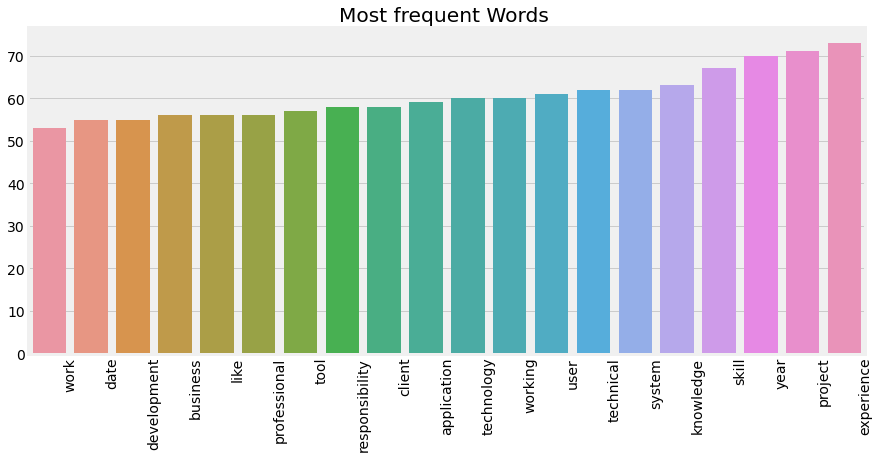

In [41]:
plt.figure(figsize=(15,6))
wordBarGraphFunction_1(resume_data,"Resume","Most frequent Words ")

## Vectorisation

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [43]:
'''
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=2000)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    stop_words='english',
    ngram_range=(2, 6),
    max_features=2000)
char_vectorizer.fit(requiredText)
CharFeatures = char_vectorizer.transform(requiredText)
totalFeatures = hstack([WordFeatures, CharFeatures])
'''

"\nword_vectorizer = TfidfVectorizer(\n    sublinear_tf=True,\n    strip_accents='unicode',\n    analyzer='word',\n    token_pattern=r'\\w{1,}',\n    stop_words='english',\n    ngram_range=(1, 1),\n    max_features=2000)\nword_vectorizer.fit(requiredText)\nWordFeatures = word_vectorizer.transform(requiredText)\n\nchar_vectorizer = TfidfVectorizer(\n    sublinear_tf=True,\n    strip_accents='unicode',\n    analyzer='char',\n    stop_words='english',\n    ngram_range=(2, 6),\n    max_features=2000)\nchar_vectorizer.fit(requiredText)\nCharFeatures = char_vectorizer.transform(requiredText)\ntotalFeatures = hstack([WordFeatures, CharFeatures])\n"

## TF-IDF

In [44]:
requiredText = resume_data["Resume"]
requiredTarget = resume_data["Encoded_Skill"].values


#word_vectorizer = TfidfVectorizer()
#word_vectorizer.fit(requiredText)
#WordFeatures = word_vectorizer.fit_transform(requiredText)

word_vectorizer = TfidfVectorizer(smooth_idf=True,analyzer='word',sublinear_tf=True,stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.fit_transform(requiredText)


#
#min_df=3,  max_features=None, 
            #strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            #ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
            #stop_words = 'english'
#ctv = CountVectorizer(analyzer='word',token_pattern=r'\w{1,}',
            #ngram_range=(1, 3), stop_words = 'english')


In [45]:
X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,
                                                 stratify=requiredTarget,random_state=42, test_size=0.3)
print(X_train.shape)
print(X_test.shape)

(53, 1500)
(24, 1500)


## Bag Of Words

In [46]:
vectorizer=CountVectorizer(analyzer='word',token_pattern=r'\w{1,}',stop_words = 'english')
bag = vectorizer.fit_transform(requiredText)

In [47]:
vectorizer.vocabulary_

{'anubhav': 165,
 'kumar': 1725,
 'singh': 2892,
 'work': 3474,
 'globally': 1317,
 'competitive': 583,
 'environment': 1068,
 'challenging': 487,
 'assignment': 225,
 'shall': 2849,
 'yield': 3511,
 'twin': 3281,
 'benefit': 332,
 'job': 1667,
 'satisfaction': 2757,
 'steady': 3023,
 'paced': 2197,
 'professional': 2428,
 'growth': 1361,
 'experience': 1125,
 'current': 746,
 'hcl': 1400,
 'role': 2718,
 'admin': 62,
 'offshore': 2126,
 'skill': 2904,
 'shell': 2857,
 'scripting': 2792,
 'linux': 1791,
 'peoplesoft': 2265,
 'administration': 67,
 'github': 1308,
 'managing': 1863,
 'hcm': 1401,
 'fscm': 1257,
 'production': 2424,
 'support': 3092,
 'installed': 1576,
 'window': 3461,
 'o': 2105,
 'involved': 1630,
 'day': 780,
 'activity': 43,
 'project': 2441,
 'migration': 1950,
 'database': 772,
 'refresh': 2602,
 'change': 488,
 'tax': 3144,
 'update': 3314,
 'troubleshooting': 3272,
 'server': 2832,
 'like': 1780,
 'application': 175,
 'web': 3442,
 'process': 2415,
 'scheduler':

In [48]:
print(vectorizer.get_feature_names())

['ab', 'abdul', 'ability', 'able', 'abreast', 'absence', 'absent', 'abstract', 'abstraction', 'ac', 'academic', 'accenture', 'accept', 'acceptable', 'acceptance', 'access', 'accessibility', 'accessible', 'accessing', 'accessory', 'acclimatize', 'accommodate', 'accomplish', 'accomplished', 'according', 'account', 'accountant', 'accounting', 'accuracy', 'achieve', 'achieved', 'achievement', 'achieving', 'acknowledged', 'acknowledgement', 'acquisition', 'act', 'action', 'actionable', 'activated', 'activating', 'active', 'actively', 'activity', 'ad', 'adapt', 'adaptability', 'adaptive', 'add', 'added', 'adding', 'additional', 'additionally', 'additive', 'addm', 'address', 'addressing', 'adept', 'adhere', 'adhering', 'adhoc', 'aditya', 'admin', 'adminissions', 'administer', 'administering', 'administrating', 'administration', 'administrative', 'administrator', 'admission', 'adobe', 'adopt', 'adopting', 'adp', 'advance', 'advanced', 'advancement', 'advantage', 'ae', 'aetna', 'affecting', 'af

In [49]:
import numpy as np

In [50]:
X=bag.toarray()

In [51]:
X_train_1,X_test_1,y_train_1,y_test_1 = train_test_split(X,requiredTarget,
                                                 stratify=requiredTarget,random_state=42, test_size=0.3)

In [52]:
vectorizer1 = CountVectorizer(min_df = 1, max_df = 0.9)
count_vect = vectorizer1.fit_transform(resume_data["Resume"])
word_freq_df = pd.DataFrame({'term': vectorizer1.get_feature_names(), 'occurrences':np.asarray(count_vect.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
word_freq_df

term  occurrences  frequency
0           ab            1   0.000062
1        abdul            1   0.000062
2      ability           30   0.001863
3         able            1   0.000062
4      abreast            1   0.000062
...        ...          ...        ...
3509      york            1   0.000062
3510        yr            1   0.000062
3511  zenefits            1   0.000062
3512      zero            1   0.000062
3513        zp            2   0.000124

[3514 rows x 3 columns]

<AxesSubplot:ylabel='Density'>

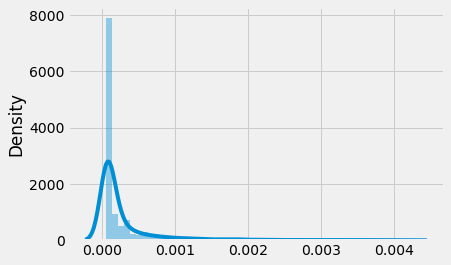

In [53]:
sns.distplot(x =[word_freq_df['frequency']])

In [54]:
vectorizer2 = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer2.fit_transform(resume_data["Resume"])
names_features = vectorizer2.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()
df12 = pd.DataFrame(denselist, columns = names_features)
df12

ability   absence  academic  acceptance    access  according   account  \
0   0.000000  0.000000       0.0    0.000000  0.084475   0.000000  0.000000   
1   0.000000  0.000000       0.0    0.081223  0.000000   0.000000  0.000000   
2   0.000000  0.000000       0.0    0.000000  0.080131   0.000000  0.000000   
3   0.000000  0.000000       0.0    0.000000  0.000000   0.000000  0.000000   
4   0.000000  0.000000       0.0    0.000000  0.000000   0.000000  0.000000   
..       ...       ...       ...         ...       ...        ...       ...   
72  0.051065  0.076271       0.0    0.087039  0.076271   0.083911  0.061408   
73  0.049375  0.073748       0.0    0.000000  0.073748   0.000000  0.000000   
74  0.000000  0.069802       0.0    0.000000  0.069802   0.000000  0.056200   
75  0.077007  0.115018       0.0    0.000000  0.000000   0.000000  0.000000   
76  0.053395  0.079751       0.0    0.000000  0.000000   0.000000  0.064210   

    achieve  achievement    active  ...  world  write    writer   writing  \
0       0.0     0.000000  0.000000  ...    0.0    0.0  0.000000  0.066645   
1       0.0     0.000000  0.000000  ...    0.0    0.0  0.000000  0.000000   
2       0.0     0.000000  0.091444  ...    0.0    0.0  0.000000  0.000000   
3       0.0     0.000000  0.121063  ...    0.0    0.0  0.000000  0.000000   
4       0.0     0.093908  0.000000  ...    0.0    0.0  0.000000  0.000000   
..      ...          ...       ...  ...    ...    ...       ...       ...   
72      0.0     0.000000  0.000000  ...    0.0    0.0  0.062704  0.060173   
73      0.0     0.071692  0.000000  ...    0.0    0.0  0.060630  0.058182   
74      0.0     0.000000  0.000000  ...    0.0    0.0  0.057386  0.000000   
75      0.0     0.000000  0.000000  ...    0.0    0.0  0.094559  0.090742   
76      0.0     0.000000  0.000000  ...    0.0    0.0  0.065565  0.062918   

    written  wrote       xml     xpath      xslt       xtt  
0       0.0    0.0  0.000000  0.000000  0.000000  0.000000  
1       0.0    0.0  0.000000  0.000000  0.000000  0.000000  
2       0.0    0.0  0.000000  0.000000  0.000000  0.000000  
3       0.0    0.0  0.000000  0.000000  0.000000  0.000000  
4       0.0    0.0  0.000000  0.000000  0.000000  0.000000  
..      ...    ...       ...       ...       ...       ...  
72      0.0    0.0  0.062704  0.099522  0.064066  0.000000  
73      0.0    0.0  0.060630  0.000000  0.061947  0.091548  
74      0.0    0.0  0.057386  0.000000  0.058633  0.086650  
75      0.0    0.0  0.094559  0.000000  0.096614  0.000000  
76      0.0    0.0  0.065565  0.000000  0.066990  0.000000  

[77 rows x 1000 columns]

# Model Building || Model Training || Model Evaluation

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_auc_score,accuracy_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import plotly as py
from plotly.offline import init_notebook_mode, iplot
#init_notebook_mode(connected=True)
import plotly.graph_objs as go

### 1.LogisticRegression

In [56]:
lr = LogisticRegression(class_weight ='balanced',multi_class='ovr',solver='lbfgs',C=100.0)
lr.fit(X_train, y_train)
lr_train_predict=lr.predict(X_train)
lr_prediction = lr.predict(X_test)
lr_score = lr.score(X_test,y_test)
print("Logistic Regression Train Accuracy: {}%".format(round(lr.score(X_train,y_train)*100,2)))
print("Logistic Regression Test Accuracy: {}%".format(round(lr.score(X_test,y_test)*100,2)))
lr_cm = confusion_matrix(y_test, lr_prediction)
print("Classification Report:Train Data\n")
print(classification_report(y_train, lr_train_predict))
print("-----------------------------------------------------------\n")
print("Classification Report:Test Data\n")
print(classification_report(y_test, lr_prediction))

Logistic Regression Train Accuracy: 100.0%
Logistic Regression Test Accuracy: 95.83%
Classification Report:Train Data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        15

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53

-----------------------------------------------------------

Classification Report:Test Data

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         6
           2       0.88      1.00      0.93         7
           3       1.00      1.00      1.00         4
           4       1.00    

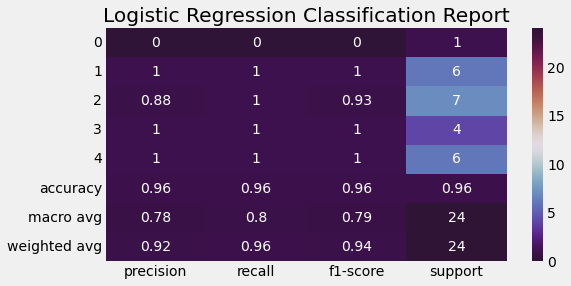

In [57]:
clf_report = classification_report(y_test, lr_prediction,
                                   labels=None,
                                   target_names=None,
                                   output_dict=True)

plt.figure(figsize=(8,4))
sns.heatmap(pd.DataFrame(clf_report).T, annot=True,cmap="twilight_shifted")
plt.title("Logistic Regression Classification Report")
plt.show()

In [58]:
lr = LogisticRegression(class_weight ='balanced')
lr.fit(X_train_1, y_train_1)
lr_prediction = lr.predict(X_test_1)
lr_score = lr.score(X_test_1,y_test_1)
print("Logistic Regression Train Accuracy: {}%".format(round(lr.score(X_train_1,y_train_1)*100,2)))
print("Logistic Regression Test Accuracy: {}%".format(round(lr.score(X_test_1,y_test_1)*100,2)))
lr_cm = confusion_matrix(y_test_1, lr_prediction)
print("Classification Report:\n")
print(classification_report(y_test_1, lr_prediction))

Logistic Regression Train Accuracy: 100.0%
Logistic Regression Test Accuracy: 95.83%
Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         6
           2       0.88      1.00      0.93         7
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         6

    accuracy                           0.96        24
   macro avg       0.78      0.80      0.79        24
weighted avg       0.92      0.96      0.94        24



### 2.Support Vector Machine 

In [59]:
svm =OneVsRestClassifier(SVC(C=1.0,kernel='linear',degree=3,gamma='scale',class_weight ='balanced'))
svm.fit(X_train_1, y_train_1)
svm_train_predict=svm.predict(X_train_1)
svm_prediction = svm.predict(X_test_1)
svm_score = svm.score(X_test_1, y_test_1)
print("SVM Classification Train Accuracy: {}%".format(round(svm.score(X_train_1,y_train_1)*100,2)))
print("SVM Classification Test Accuracy: {}%".format(round(svm.score(X_test_1,y_test_1)*100,2)))
svm_cm = confusion_matrix(y_test_1, svm_prediction)
print("Classification Report:Train data\n")
print(classification_report(y_train_1, svm_train_predict))
print("---------------------------------------------------------\n")
print("Classification Report:Test data\n")
print(classification_report(y_test_1, svm_prediction))

SVM Classification Train Accuracy: 100.0%
SVM Classification Test Accuracy: 95.83%
Classification Report:Train data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        15

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53

---------------------------------------------------------

Classification Report:Test data

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         6
           2       0.88      1.00      0.93         7
           3       1.00      1.00      1.00         4
           4       1.00      1.

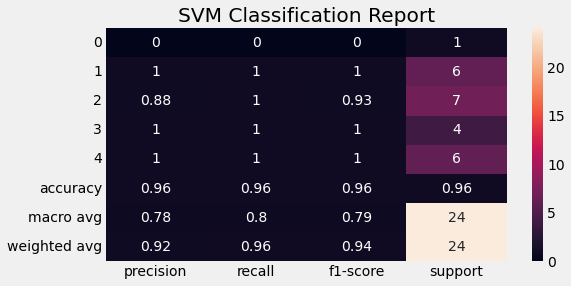

In [60]:
clf_report1 = classification_report(y_test_1, svm_prediction,
                                   labels=None,
                                   target_names=None,
                                   output_dict=True)

plt.figure(figsize=(8,4))
sns.heatmap(pd.DataFrame(clf_report1).T, annot=True,cmap="rocket")
plt.title("SVM Classification Report")
plt.show()

### 3. RandomForestClassifier

In [61]:
rf =OneVsRestClassifier(RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=5,
                                               max_features='auto',random_state=None,
 class_weight="balanced"))
rf.fit(X_train, y_train)
rf_train_predict=rf.predict(X_train)
rf_prediction = rf.predict(X_test)
rf_score = rf.score(X_test, y_test)
print("Random Forest Classification Train Accuracy: {}%".format(round(rf.score(X_train,y_train)*100,2)))
print("Random Forest Classification Test Accuracy: {}%".format(round(rf.score(X_test,y_test)*100,2)))
rf_cm = confusion_matrix(y_test, rf_prediction)
print("Classification Report:Train data\n")
print(classification_report(y_train,rf_train_predict))
print("------------------------------------------------------------\n")
print("Classification Report:Test data\n")
print(classification_report(y_test, rf_prediction))

Random Forest Classification Train Accuracy: 100.0%
Random Forest Classification Test Accuracy: 91.67%
Classification Report:Train data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        15

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53

------------------------------------------------------------

Classification Report:Test data

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      0.83      0.91         6
           2       0.78      1.00      0.88         7
           3       1.00      1.00      1.00         4
        

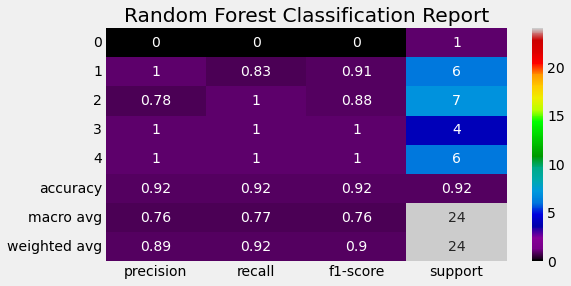

In [62]:
clf_report2 = classification_report(y_test, rf_prediction,
                                   labels=None,
                                   target_names=None,
                                   output_dict=True)

plt.figure(figsize=(8,4))
sns.heatmap(pd.DataFrame(clf_report2).T, annot=True,cmap="nipy_spectral")
plt.title("Random Forest Classification Report")
plt.show()

### Hyper Parameter Tunning  GridSearchCV

In [63]:
from sklearn.model_selection import GridSearchCV

grid_search_ = GridSearchCV(estimator =RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=5,
                                               max_features='auto',random_state=None,class_weight="balanced"),
                            param_grid = {'criterion':['entropy','gini'],
                                                                'max_depth':[1,2,3,4,5,6,7,8,9,10]},
                              cv=5)
grid_search_.fit(X_train,y_train)
print(grid_search_.best_params_)
print(grid_search_.best_score_)

{'criterion': 'entropy', 'max_depth': 4}
0.9818181818181818


In [64]:
train_accuracy_1=[]
test_accuracy_1=[]
for depth in range(1,10):
    model_2=RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=depth,max_features='auto',random_state=None,
 class_weight="balanced")
    model_2.fit(X_train,y_train)
    train_accuracy_1.append(model_2.score(X_train,y_train))
    test_accuracy_1.append(model_2.score(X_test,y_test))

Text(0, 0.5, 'performance')

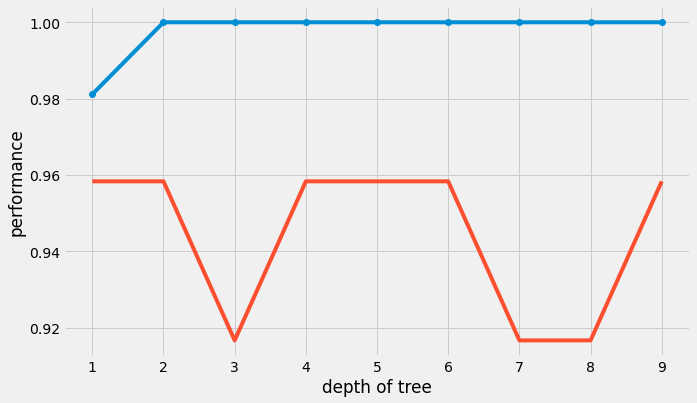

In [65]:
frame_1=pd.DataFrame({'max_depth':range(1,10),'train_acc':train_accuracy_1,'test_acc':test_accuracy_1})
plt.figure(figsize=(10,6))
plt.plot(frame_1["max_depth"],frame_1["train_acc"],marker='o')
plt.plot(frame_1["max_depth"],frame_1["test_acc"])
plt.xlabel("depth of tree")
plt.ylabel("performance")

### 4.DecisionTreeClassifier

In [66]:
dt = OneVsRestClassifier(DecisionTreeClassifier(criterion='entropy',
                                                class_weight = "balanced",splitter='best',max_depth=None))
dt.fit(X_train, y_train)
dt_train_predict=dt.predict(X_train)
dt_prediction = dt.predict(X_test)
dt_score = dt.score(X_test, y_test)
print("Decision Tree Classification Train Accuracy: {}%".format(round(dt.score(X_train,y_train)*100,2)))
print("Decision Tree Classification Test Accuracy: {}%".format(round(dt.score(X_test,y_test)*100,2)))
dt_cm = confusion_matrix(y_test, dt_prediction)
print("Classification Report:Train data\n")
print(classification_report(y_train,dt_train_predict))
print("----------------------------------------------------\n")
print("Classification Report:Test data\n")
print(classification_report(y_test, dt_prediction))

Decision Tree Classification Train Accuracy: 100.0%
Decision Tree Classification Test Accuracy: 79.17%
Classification Report:Train data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        15

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53

----------------------------------------------------

Classification Report:Test data

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      0.83      0.91         6
           2       0.71      0.71      0.71         7
           3       1.00      0.75      0.86         4
           4    

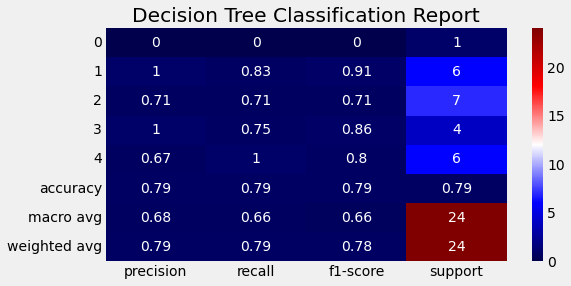

In [67]:
clf_report3 = classification_report(y_test, dt_prediction,
                                   labels=None,
                                   target_names=None,
                                   output_dict=True)

plt.figure(figsize=(8,4))
sns.heatmap(pd.DataFrame(clf_report3).T, annot=True,cmap="seismic")
plt.title("Decision Tree Classification Report")
plt.show()

### 5.MultinomialNB

In [68]:
clf =MultinomialNB(alpha=1, fit_prior=False, class_prior=None).fit(X_train, y_train)
train_predict=clf.predict(X_train)
prediction = clf.predict(X_test)
print('Accuracy of MultinomialNB Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of MultinomialNB Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))
print("Classification report for Train data classifier %s:\n%s\n" % (clf, metrics.classification_report(y_train,train_predict)))

print("--------------------------------------------------\n")

print("Classification report for Test data classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))
nb_score = clf.score(X_test, y_test)
nb_cm = confusion_matrix(y_test, prediction)

Accuracy of MultinomialNB Classifier on training set: 1.00
Accuracy of MultinomialNB Classifier on test set: 0.92
Classification report for Train data classifier MultinomialNB(alpha=1, fit_prior=False):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        15

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53


--------------------------------------------------

Classification report for Test data classifier MultinomialNB(alpha=1, fit_prior=False):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      0.83      0.91         6
    

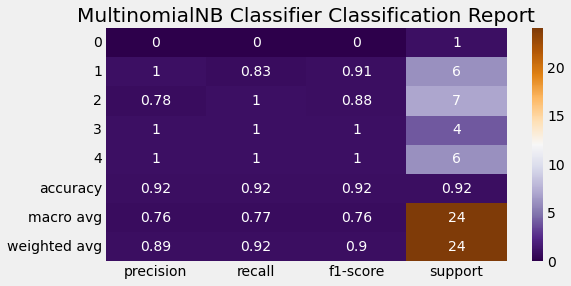

In [69]:
clf_report4 = classification_report(y_test, prediction,
                                   labels=None,
                                   target_names=None,
                                   output_dict=True)

plt.figure(figsize=(8,4))
sns.heatmap(pd.DataFrame(clf_report4).T, annot=True,cmap="PuOr_r")
plt.title("MultinomialNB Classifier Classification Report")
plt.show()

### 6.KNeighborsClassifier

In [70]:
knn =KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_train_predict=knn.predict(X_train)

knn_prediction = knn.predict(X_test)
knn_score = knn.score(X_test, y_test)
print("KNN Classification Train Accuracy: {}%".format(round(knn.score(X_train,y_train)*100,2)))
print("KNN Classification Test Accuracy: {}%".format(round(knn.score(X_test,y_test)*100,2)))
knn_cm = confusion_matrix(y_test, knn_prediction)
print('Classification Report:Train data\n')
print(classification_report(y_train, knn_train_predict))
print("------------------------------------------------------------\n")
print('Classification Report:Test data\n')

print(classification_report(y_test, knn_prediction))

KNN Classification Train Accuracy: 92.45%
KNN Classification Test Accuracy: 91.67%
Classification Report:Train data

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      0.86      0.92        14
           2       0.93      0.93      0.93        14
           3       1.00      1.00      1.00         9
           4       0.88      1.00      0.94        15

    accuracy                           0.92        53
   macro avg       0.76      0.76      0.76        53
weighted avg       0.93      0.92      0.92        53

------------------------------------------------------------

Classification Report:Test data

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.86      1.00      0.92         6
           2       0.86      0.86      0.86         7
           3       1.00      1.00      1.00         4
           4       1.00     

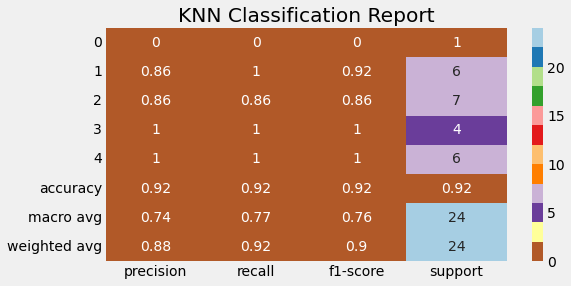

In [71]:
clf_report5 = classification_report(y_test, knn_prediction,
                                   labels=None,
                                   target_names=None,
                                   output_dict=True)

plt.figure(figsize=(8,4))
sns.heatmap(pd.DataFrame(clf_report5).T, annot=True,cmap="Paired_r")
plt.title("KNN Classification Report")
plt.show()

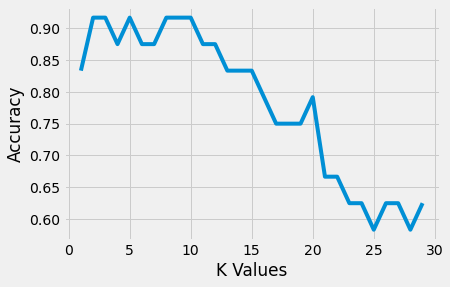

In [72]:
#Find Best K Value

score_list = []
for each in range(1,30):
    knn2 =KNeighborsClassifier(n_neighbors=each, weights='uniform')
    knn2.fit(X_train, y_train)
    score_list.append(knn2.score(X_test, y_test))
plt.plot(range(1,30), score_list)
plt.xlabel("K Values")
plt.ylabel("Accuracy")
plt.show()

### 7. XGBClassifier 

In [73]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

In [74]:
xgb_classifer= XGBClassifier(n_estimators=200,max_depth=6,booster="gbtree",learning_rate=0.005)
xgb_classifer.fit(X_train,y_train)
xgb_train_predict=xgb_classifer.predict(X_train)
xgb_prediction = xgb_classifer.predict(X_test)
xgb_score = xgb_classifer.score(X_test, y_test)
print("\n")
print("XGB Classification Train Accuracy: {}%".format(round(xgb_classifer.score(X_train,y_train)*100,2)))
print("XGB Classification Test Accuracy: {}%".format(round(xgb_classifer.score(X_test,y_test)*100,2)))
xgb_classifer_cm = confusion_matrix(y_test, xgb_prediction)
print("Classification Report:Train data\n")
print(classification_report(y_train, xgb_train_predict))
print("------------------------------------------------------\n")
print("Classification Report:Test data\n")
print(classification_report(y_test, xgb_prediction))

[18:46:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGB Classification Train Accuracy: 100.0%
XGB Classification Test Accuracy: 95.83%
Classification Report:Train data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        15

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53

------------------------------------------------------

Classification Report:Tes

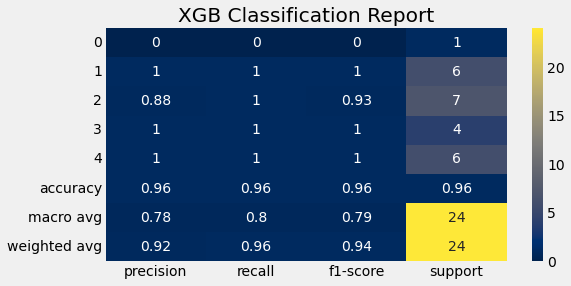

In [75]:
clf_report6 = classification_report(y_test, xgb_prediction,
                                   labels=None,
                                   target_names=None,
                                   output_dict=True)

plt.figure(figsize=(8,4))
sns.heatmap(pd.DataFrame(clf_report6).T, annot=True,cmap="cividis")
plt.title("XGB Classification Report")
plt.show()

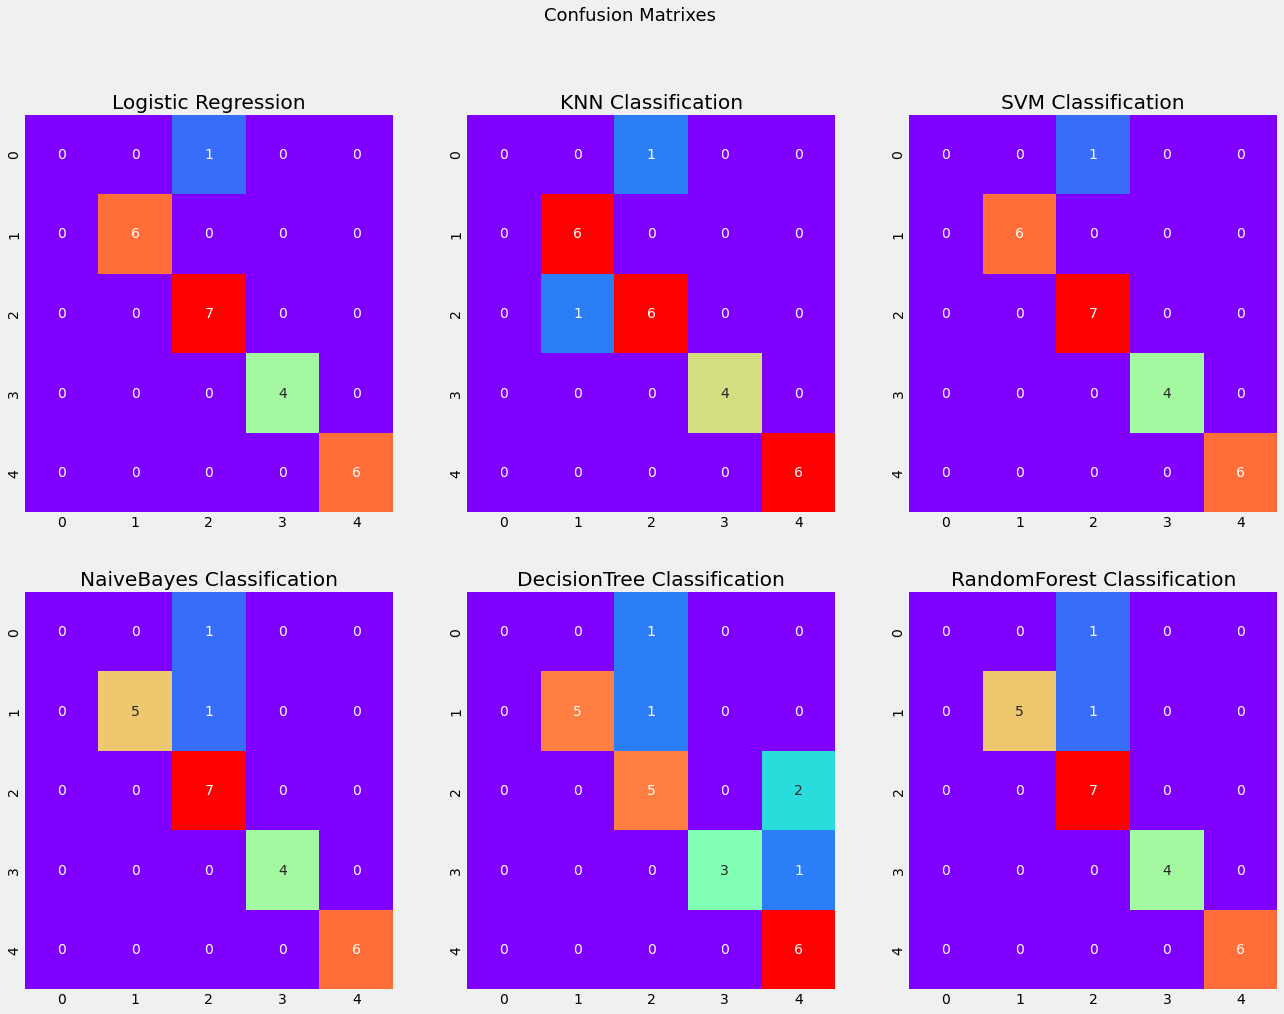

In [76]:
plt.figure(figsize=(20,15))
plt.suptitle("Confusion Matrixes", fontsize=18)

plt.subplot(2,3,1)
plt.title("Logistic Regression")
sns.heatmap(lr_cm, cbar=False, annot=True, cmap="rainbow", fmt="d")

plt.subplot(2,3,2)
plt.title("KNN Classification")
sns.heatmap(knn_cm, cbar=False, annot=True, cmap="rainbow", fmt="d")

plt.subplot(2,3,3)
plt.title("SVM Classification")
sns.heatmap(svm_cm, cbar=False, annot=True, cmap="rainbow", fmt="d")

plt.subplot(2,3,4)
plt.title("NaiveBayes Classification")
sns.heatmap(nb_cm, cbar=False, annot=True, cmap="rainbow", fmt="d")

plt.subplot(2,3,5)
plt.title("DecisionTree Classification")
sns.heatmap(dt_cm, cbar=False, annot=True, cmap="rainbow", fmt="d")

plt.subplot(2,3,6)
plt.title("RandomForest Classification")
sns.heatmap(rf_cm, cbar=False, annot=True, cmap="rainbow", fmt="d")

plt.show()

In [77]:
TN = [lr_cm[0,0], knn_cm[0,0], svm_cm[0,0], nb_cm[0,0], dt_cm[0,0], rf_cm[0,0],xgb_classifer_cm[0,0]]
FP = [lr_cm[0,1], knn_cm[0,1], svm_cm[0,1], nb_cm[0,1], dt_cm[0,1], rf_cm[0,1],xgb_classifer_cm[0,1]]
FN = [lr_cm[1,0], knn_cm[1,0], svm_cm[1,0], nb_cm[1,0], dt_cm[1,0], rf_cm[1,0],xgb_classifer_cm[1,0]]
TP = [lr_cm[1,1], knn_cm[1,1], svm_cm[1,1], nb_cm[1,1], dt_cm[1,1], rf_cm[1,1],xgb_classifer_cm[1,1]]
Accuracy = [lr_score, knn_score, svm_score, nb_score, dt_score, rf_score,xgb_score]
#MSE = [lr_mse, knn_mse, svm_mse, nb_mse, dt_mse, rf_mse]
Classification = ["Logistic Regression", "KNN Classification", "SVM Classification", "Naive Bayes Classification", 
                  "Decision Tree Classification", "Random Forest Classification","Xgboost Classifier"]
list_matrix = [Classification, TN, FP, FN, TP, Accuracy]
list_headers = ["Model", "TN", "FP", "FN", "TP", "Accuracy"]
zipped = list(zip(list_headers, list_matrix))
data_dict = dict(zipped)
df_1=pd.DataFrame(data_dict)

In [78]:
df_1

Model  TN  FP  FN  TP  Accuracy
0           Logistic Regression   0   0   0   6  0.958333
1            KNN Classification   0   0   0   6  0.916667
2            SVM Classification   0   0   0   6  0.958333
3    Naive Bayes Classification   0   0   0   5  0.916667
4  Decision Tree Classification   0   0   0   5  0.791667
5  Random Forest Classification   0   0   0   5  0.916667
6            Xgboost Classifier   0   0   0   6  0.958333

In [79]:
trace1 = {
    'x':df_1.Model,
    'y':df_1.TN,
    'name':'True Negative',
    'type':'bar'}

trace2 = {
    'x':df_1.Model,
    'y':df_1.FP,
    'name':'False Positive',
    'type':'bar'}

trace3 = {
    'x':df_1.Model,
    'y':df_1.FN,
    'name':'False Negative',
    'type':'bar'}

trace4 = {
    'x':df_1.Model,
    'y':df_1.TP,
    'name':'True Positive',
    'type':'bar'}

graph = [trace1, trace2, trace3, trace4];
layout = {
  'xaxis': {'title': 'Classification Models'},
  'barmode': 'relative',
  'title': 'Confusion Matrix Values of Classification Models'
};
fig = go.Figure(data = graph, layout = layout)
iplot(fig)

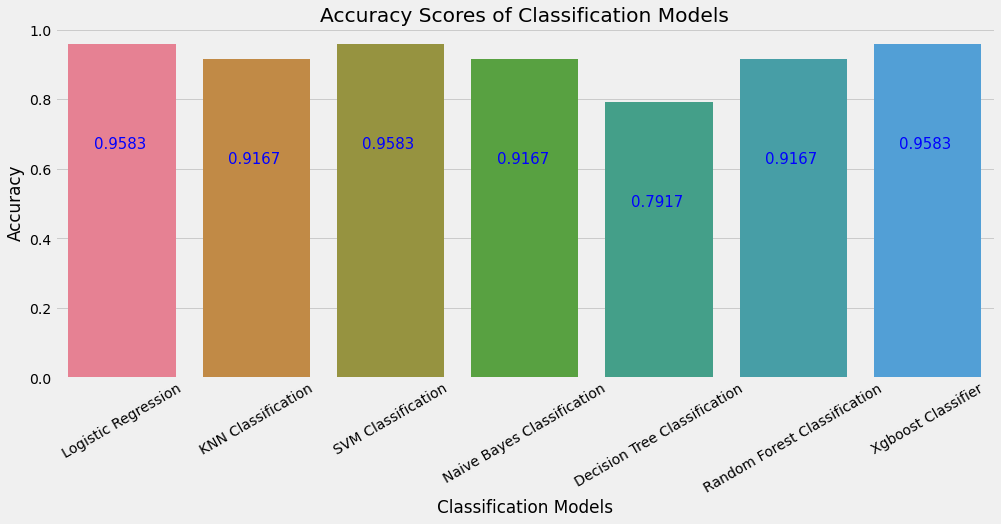

In [80]:
#Accuracy
plt.figure(figsize=(15,6))
ax= sns.barplot(x=df_1.Model, y=df_1.Accuracy, palette =sns.color_palette("husl", 9) )
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores of Classification Models')
for i in ax.patches:
    ax.text(i.get_x()+.19, i.get_height()-0.3, \
            str(round((i.get_height()), 4)), fontsize=15, color='b')
plt.show()
#sns.cubehelix_palette(len(df_1.Model)

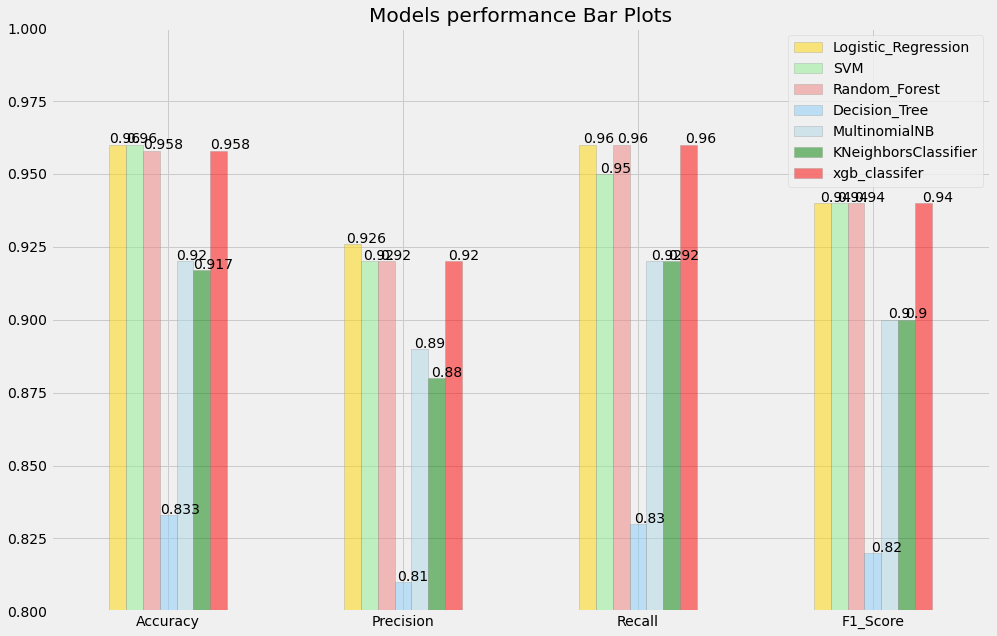

In [81]:
models_metrics = {
                  "Logistic_Regression"  :[0.96 , 0.926, 0.96, 0.94],
                  "SVM"      :    [0.96, 0.92, 0.95 , 0.94],
                  "Random_Forest" :  [0.958,   0.92 , 0.96  , 0.94],
                  "Decision_Tree" : [0.833, 0.81 ,0.83 , 0.82],
                  "MultinomialNB" :[  0.92,0.89 , 0.92 ,0.90],
                  "KNeighborsClassifier"  : [0.917,0.88 ,0.92 ,0.90],
                  "xgb_classifer"  :[0.958, 0.92 , 0.96 , 0.94  ],

                }
df_111 = pd.DataFrame(data = models_metrics)
df_111.rename(index={0:'Accuracy',1:'Precision', 2: 'Recall',3:"F1_Score"}, 
                 inplace=True)
ax = df_111.plot(kind='bar', figsize = (15,10), ylim = (0.80, 1.00), 
        color = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue',"lightblue","green","red"],
        rot = 0, title ='Models performance Bar Plots',
        edgecolor = 'grey', alpha = 0.5)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.0005))
plt.show()

In [82]:
import pickle
from pickle import dump
from pickle import load

In [83]:
#dump(lr,open('log_model_intelligence.pkl','wb'))

In [84]:
#dump(svm,open('Spport_Vector_model_intelligence.pkl','wb'))

In [85]:
#dump(rf ,open('Random_Forest_model_intelligence.pkl','wb'))

In [86]:
#dump(xgb_classifer ,open('Xgb_classifer_model_intelligence.pkl','wb'))

In [87]:
#loaded_model = load(open('log_model_intelligence.pkl','rb'))

In [88]:
#y_pred = loaded_model.predict(X_test)

In [89]:
#accuracy_score(y_test,y_pred)